In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom

# QUE

Detection and Handling of missing values using Pandas.

## IMPORT HEADER FILES

## DATA

In [2]:
data = pd.read_csv("USA_Housing - USA_Housing.csv")
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,NaN,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NaN
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,NaN,8.512727,5.13,36882.15940,NaN,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,NaN
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
cat_data = pd.read_csv("winemag-data.csv")
cat_data

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


## MATHEMATICAL FUNCTIONS ON DATA

In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4972.000000,4964.000000,4960.000000,4963.000000,4956.000000,4.964000e+03
mean,68564.655345,5.976635,6.988323,3.983067,36161.988421,1.232359e+06
std,10662.047738,0.991356,1.007126,1.236013,9936.112925,3.532117e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61461.357480,5.322207,6.298702,3.140000,29394.256185,9.985867e+05
50%,68787.591875,5.972696,7.002902,4.050000,36202.541765,1.232923e+06
75%,75769.457190,6.651184,7.666914,4.490000,42861.290770,1.471956e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
data.mean()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_21088\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Avg. Area Income                6.856466e+04
Avg. Area House Age             5.976635e+00
Avg. Area Number of Rooms       6.988323e+00
Avg. Area Number of Bedrooms    3.983067e+00
Area Population                 3.616199e+04
Price                           1.232359e+06
dtype: float64

In [6]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.004415,-0.014890,0.019420,-0.018195,0.638757
Avg. Area House Age,-0.004415,1.000000,-0.011376,0.005586,-0.016515,0.450790
Avg. Area Number of Rooms,-0.014890,-0.011376,1.000000,0.462788,0.004475,0.337604
Avg. Area Number of Bedrooms,0.019420,0.005586,0.462788,1.000000,-0.022774,0.172004
Area Population,-0.018195,-0.016515,0.004475,-0.022774,1.000000,0.410682
Price,0.638757,0.450790,0.337604,0.172004,0.410682,1.000000


## SELECTING ONLY SPECIFIC DATA

In [7]:
data.iloc[0]

Avg. Area Income                        NaN
Avg. Area House Age                5.682861
Avg. Area Number of Rooms          7.009188
Avg. Area Number of Bedrooms           4.09
Area Population                  23086.8005
Price                           1059033.558
Address                                 NaN
Name: 0, dtype: object

In [8]:
data.iloc[[0]]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,NaN,5.682861,7.009188,4.09,23086.8005,1059033.558,NaN


In [9]:
data.iloc[5:15]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1068138.074,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,NaN,6.025336,8.147760,3.41,60828.24909,1502055.817,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,NaN,2.42,36516.35897,1573936.564,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,798869.528,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1545154.813,Unit 9446 Box 0958\nDPO AE 97025
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,80527.47208,8.093513,5.042747,4.10,47224.35984,1707045.722,"6368 John Motorway Suite 700\nJanetbury, NM 26854"
12,50593.69550,4.496513,7.467627,4.49,34343.99189,NaN,"911 Castillo Park Apt. 717\nDavisborough, PW 7..."
13,39033.80924,7.671755,7.250029,3.10,39220.36147,1042814.098,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
14,73163.66344,6.919535,NaN,2.27,32326.12314,1291331.518,"829 Welch Track Apt. 992\nNorth John, AR 26532..."


In [10]:
data.iloc[lambda x: x.index % 2 != 0]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.807,NaN
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1068138.074,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
7,78394.33928,6.989780,NaN,2.42,36516.35897,1573936.564,"972 Joyce Viaduct\nLake William, TN 17778-6483"
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1545154.813,Unit 9446 Box 0958\nDPO AE 97025
...,...,...,...,...,...,...,...
4991,74102.19189,5.657841,7.683993,3.13,24041.27059,1263720.518,"2871 John Lodge\nAmychester, GU 61734-5597"
4993,69639.14090,5.007510,7.778375,6.05,54056.12843,1381830.779,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786,USNS Williams\nFPO AP 30153-7653
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [11]:
data.iloc[5,3]

4.04

In [12]:
data.iloc[:, lambda data: [2, 4]]

,Avg. Area Number of Rooms,Area Population
0,7.009188,23086.80050
1,6.730821,40173.07217
2,8.512727,36882.15940
3,5.586729,34310.24283
4,7.839388,26354.10947
...,...,...
4995,6.137356,22837.36103
4996,6.576763,25616.11549
4997,4.805081,33266.14549
4998,7.130144,42625.62016


In [13]:
data.iloc[4:20:2,3::2]

,Avg. Area Number of Bedrooms,Price
4,4.23,6.309435e+05
6,3.41,1.502056e+06
8,2.30,7.988695e+05
10,NaN,NaN
12,4.49,NaN
14,2.27,1.291332e+06
16,NaN,1.306675e+06
18,4.30,5.284852e+05


## FINDING AND TREATING MISSING VALUES 

### By Dropping Rows

In [14]:
data.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Avg. Area Income                28
Avg. Area House Age             36
Avg. Area Number of Rooms       40
Avg. Area Number of Bedrooms    37
Area Population                 44
Price                           36
Address                         34
dtype: int64

In [16]:
data.isnull().sum().sum()

255

In [17]:
nanrow = data.dropna()
nanrow

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025
...,...,...,...,...,...,...,...
4994,73060.84623,5.293682,6.312253,4.16,22695.69548,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [18]:
nanrow.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [19]:
nanrow.isnull().sum().sum()

0

### By Dropping Columns

In [21]:
nancol = data.drop(['Avg. Area House Age','Avg. Area Number of Rooms'], axis = 1)
nancol

,Avg. Area Income,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,NaN,4.09,23086.80050,1.059034e+06,NaN
1,79248.64245,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.13,36882.15940,NaN,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,3.26,34310.24283,1.260617e+06,NaN
4,59982.19723,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...
4995,60567.94414,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [22]:
nancol = data.drop(columns = ['Area Population','Price'])
nancol

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Address
0,NaN,5.682861,7.009188,4.09,NaN
1,79248.64245,6.002900,6.730821,3.09,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,NaN,8.512727,5.13,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,NaN
4,59982.19723,5.040555,7.839388,4.23,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,USS Wallace\nFPO AE 73316


### By Filling Rows

#### With Constant

In [23]:
nanfl = data.fillna(0)
nanfl

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0.00000,5.682861,7.009188,4.09,23086.80050,1.059034e+06,0
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,0.000000,8.512727,5.13,36882.15940,0.000000e+00,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,0
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [24]:
nanfl.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [25]:
nanfl.isnull().sum().sum()

0

#### With Mean

In [26]:
nanfl = data.fillna(data.mean())
nanfl

C:\Users\BAPS\AppData\Local\Temp\ipykernel_21088\2000251889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nanfl = data.fillna(data.mean())


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,68564.655345,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NaN
1,79248.642450,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067180,5.976635,8.512727,5.13,36882.15940,1.232359e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240050,7.188236,5.586729,3.26,34310.24283,1.260617e+06,NaN
4,59982.197230,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275430,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686890,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331240,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [27]:
nanfl.isnull().sum()

Avg. Area Income                 0
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                            0
Address                         34
dtype: int64

In [28]:
nanfl.isnull().sum().sum()

34

#### With Median

In [29]:
nanfl = data.fillna(data.median())
nanfl

C:\Users\BAPS\AppData\Local\Temp\ipykernel_21088\3656710830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nanfl = data.fillna(data.median())


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,68787.591875,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NaN
1,79248.642450,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067180,5.972696,8.512727,5.13,36882.15940,1.232923e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240050,7.188236,5.586729,3.26,34310.24283,1.260617e+06,NaN
4,59982.197230,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275430,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686890,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331240,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [30]:
nanfl.isnull().sum()

Avg. Area Income                 0
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                            0
Address                         34
dtype: int64

In [31]:
nanfl.isnull().sum().sum()

34

#### With Forward Fill

In [32]:
nanfl = data.fillna(method = "ffill")
nanfl

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,NaN,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NaN
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,6.002900,8.512727,5.13,36882.15940,1.505891e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [33]:
nanfl.isnull().sum()

Avg. Area Income                1
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         1
dtype: int64

In [34]:
nanfl.isnull().sum().sum()

2

#### With Backward Fill

In [35]:
nanfl = data.fillna(method = "bfill")
nanfl

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79248.64245,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,7.188236,8.512727,5.13,36882.15940,1.260617e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USNS Raymond\nFPO AE 09386
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [36]:
nanfl.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         1
dtype: int64

In [37]:
nanfl.isnull().sum().sum()

1

#### With Interpolation

In [38]:
naninter = data.interpolate()
naninter

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,NaN,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NaN
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,6.595568,8.512727,5.13,36882.15940,1.383254e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,NaN
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [39]:
naninter.isnull().sum()

Avg. Area Income                 1
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                            0
Address                         34
dtype: int64

In [40]:
naninter.isnull().sum().sum()

35

In [41]:
data['Price'].iloc[:20].isnull().sum()

3

### IMPUTER

To covert the dictionary into array we need to put `data['Address']` into square brackets.
To select a single column we need to put data['column'] 

#### SIMPLE IMPUTER

In [ ]:
data.iloc[:5,:3]

In [ ]:
imp1 = SimpleImputer(strategy = "most_frequent", add_indicator = True)
i1 = imp1.fit_transform([data['Address'].iloc[:20]])
i1

In [ ]:
imp2 = SimpleImputer(strategy = "constant", fill_value = 0, add_indicator = True)
i2 = imp2.fit_transform([data['Address'].iloc[:20]])
i2

In [ ]:
imp3 = SimpleImputer(strategy = "mean")
i3 = imp3.fit_transform(data.iloc[:20,:4])
i3

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

In [ ]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

#### KNN IMPUTER

In [ ]:
iknn1 = KNNImputer(n_neighbors = 2)
iknn1.fit_transform(data.iloc[:20,:4])

#### ITERATIVE IMPUTER

In [ ]:
iit1 = IterativeImputer()
iit1.fit_transform(data.iloc[:20,:4])

# QUE

Detenction and Handling of Outliers using Pandas.

## OUTLIERS

In [42]:
nr60 = nanrow.head(60)
nr60

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025
11,80527.47208,8.093513,5.042747,4.10,47224.35984,1.707046e+06,"6368 John Motorway Suite 700\nJanetbury, NM 26854"
13,39033.80924,7.671755,7.250029,3.10,39220.36147,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
15,69391.38018,5.344776,8.406418,4.37,35521.29403,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"
18,61929.07702,4.788550,5.097010,4.30,24595.90150,5.284852e+05,"5498 Rachel Locks\nNew Gregoryshire, PW 54755"
19,63508.19430,5.947165,7.187774,5.12,35719.65305,1.019426e+06,Unit 7424 Box 2786\nDPO AE 71255


### DETECTING OUTLIERS BY PLOTTING

#### DETECTING OUTLIERS BY BOXPLOT

<AxesSubplot:>

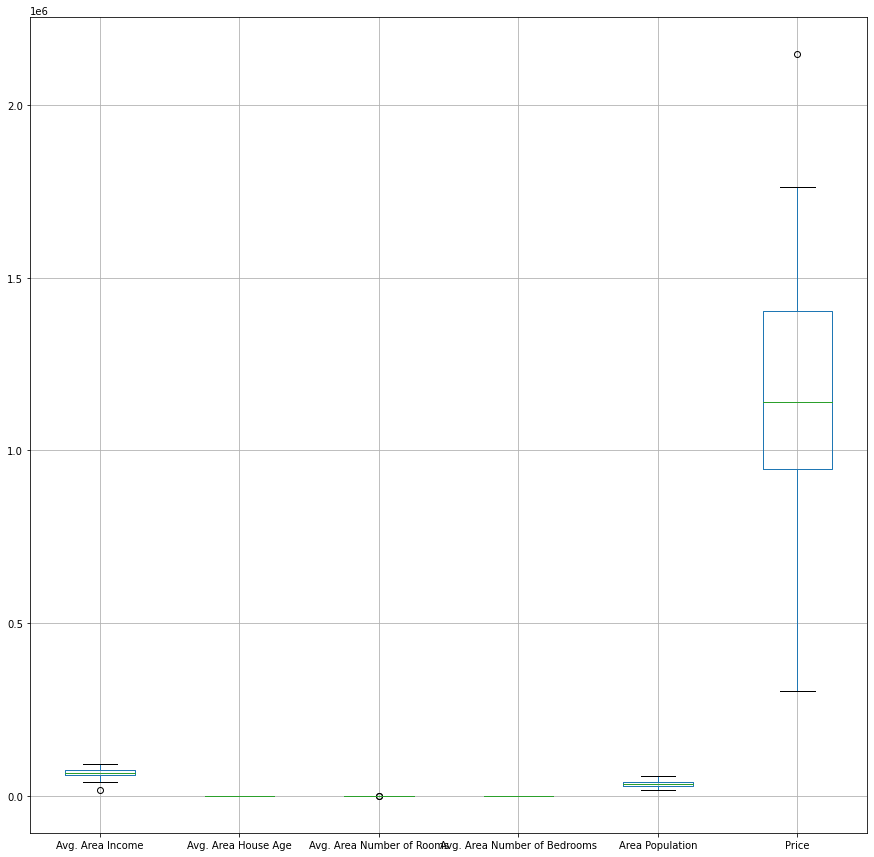

In [46]:
plt.figure(figsize=(15,15))
nr60.boxplot()

Text(0.5, 0, 'Avg. Area Number of Rooms')

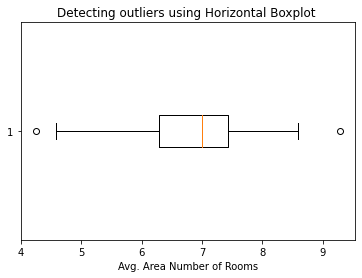

In [48]:
plt.boxplot(nr60['Avg. Area Number of Rooms'], vert = False)
plt.title("Detecting outliers using Horizontal Boxplot ")
plt.xlabel('Avg. Area Number of Rooms')

Text(0, 0.5, 'Avg. Area Number of Rooms')

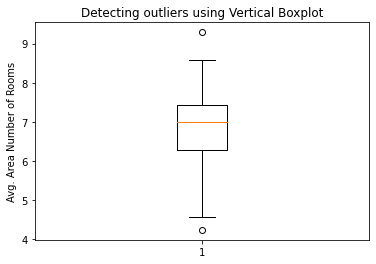

In [44]:
plt.boxplot(nr60['Avg. Area Number of Rooms'])
plt.title("Detecting outliers using Vertical Boxplot")
plt.ylabel('Avg. Area Number of Rooms')

### DETECTING OUTLIERS BY MATHEMATICAL METHODS

#### DETECTING OUTLIERS BY ZSCORE

In [49]:
def out_by_zscore(data):
    out = []
    thres = 2
    meandata = np.mean(data)
    std = np.std(data)
    print("MEAN : ", round(meandata, 6), "STANDARD DEVIANCE : ", round(std, 6))
    for i in data:
        z_sc = (i - meandata)/std
        if (np.abs(z_sc)>thres):
#             print(np.abs(z_sc))
            out.append(round(i, 6))
    return out    

In [50]:
data_out1 = out_by_zscore(nr60['Avg. Area Number of Rooms'])
print("Outliers from Z-Score : ", data_out1)

MEAN :  6.808291 STANDARD DEVIANCE :  1.021608
Outliers from Z-Score :  [4.242191, 9.289854, 4.58084]


#### DETECTING OUTLIERS BY IQR (INTER-QUARTILE RANGE)

In [51]:
def out_by_iqr(data):
    out = []
    data = np.sort(data)
    q1 = np.percentile(data, 30)
    q3 = np.percentile(data, 70)
    print("Q1 : ", round(q1, 6), "Q3 : ", round(q3, 6))
    iqr = q3 - q1
    lwr_bnd = q1 - (1.5 * iqr)
    upr_bnd = q3 + (1.5 * iqr)
    print("Lower Bound : ", round(lwr_bnd, 6), "Upper Bound : ", round(upr_bnd, 6))
    for i in data:
        if (i < lwr_bnd or i > upr_bnd):
            out.append(round(i, 6))
    return out    

In [52]:
data_out2 = out_by_iqr(nr60['Avg. Area Number of Rooms'])
print("Outliers from IQR : ", data_out2)

Q1 :  6.429756 Q3 :  7.321712
Lower Bound :  5.091822 Upper Bound :  8.659646
Outliers from IQR :  [4.242191, 4.58084, 5.034525, 5.042747, 9.289854]


### HANDLING OUTLIERS

#### TRIMMING

In [53]:
def trim(data, out):
#     print(data)
    for i in out:
        data = np.delete(np.round(data, 6), np.where(np.round(data, 6) == round(i, 6)))
    return data

In [54]:
new_trim = trim([nr60['Avg. Area Number of Rooms']], data_out1)
new_trim

array([7.839388, 6.104512, 6.393121, 8.167688, 5.042747, 7.250029,
       8.406418, 5.09701 , 7.187774, 7.091808, 8.011898, 6.517175,
       5.478088, 7.150537, 7.748682, 7.31288 , 6.992699, 6.988754,
       8.273697, 6.686686, 6.29082 , 8.591923, 7.333554, 6.593046,
       7.780837, 6.756454, 5.426903, 6.713905, 5.034525, 7.555661,
       7.606832, 7.634319, 7.440505, 7.20464 , 7.537182, 5.928223,
       6.919204, 6.252455, 7.252665, 5.831739, 6.306116, 6.445457,
       7.319886, 8.022469, 7.425597, 7.182527, 5.096917, 5.219754,
       6.911743, 5.731824, 7.325974, 7.007676, 6.51515 , 6.717844,
       5.919231, 7.078584])

In [55]:
print("LENGTH OF DATA : ", len(nr60['Avg. Area Number of Rooms']), "\nLENGTH OF TRIMMED DATA : ", len(new_trim))

LENGTH OF DATA :  60 
LENGTH OF TRIMMED DATA :  56


#### QUANTILE BASED FLOORING AND CAPPING

In [56]:
def floor(data):
    ten_per = np.percentile(np.round(data, 6), 10)
    print("Tenth Percentile : ", np.round(ten_per, 6))
    data = np.where(np.round(data, 6) < ten_per, ten_per, data)
    return data

In [57]:
def cap(data):
    nine_per = np.percentile(np.round(data, 6), 90)
    print("Ninetieth Percentile : ", np.round(nine_per, 6))
    data = np.where(np.round(data, 6) > nine_per, nine_per, data)
    return data

In [58]:
print("Outliers from Z-Score : ", out_by_zscore(nr60['Avg. Area Number of Rooms']))
data_flr = floor(nr60['Avg. Area Number of Rooms'])

print("Outliers from Z-Score : ", out_by_zscore(data_flr))

data_flr_cap = cap(data_flr)
print("Outliers from Z-Score : ", out_by_zscore(data_flr_cap))

MEAN :  6.808291 STANDARD DEVIANCE :  1.021608
Outliers from Z-Score :  [4.242191, 9.289854, 4.58084]
Tenth Percentile :  5.20748
MEAN :  6.844135 STANDARD DEVIANCE :  0.950898
Outliers from Z-Score :  [9.289854]
Ninetieth Percentile :  8.012955
MEAN :  6.799563 STANDARD DEVIANCE :  0.87244
Outliers from Z-Score :  []


#### MEAN/MEDIAN IMPUTATION

In [59]:
def imp_median(data, out):
    med = np.median(np.round(data, 6))
    for i in out:
        data = np.where(np.round(data, 6) == round(i, 6), np.round(med, 6), np.round(data, 6))
    return data

In [60]:
print("Outliers from Z-Score : ", out_by_zscore(nr60['Avg. Area Number of Rooms']))
data_med = imp_median(nr60['Avg. Area Number of Rooms'], data_out1)
print("Outliers from Z-Score : ", out_by_zscore(data_med))
data_med

MEAN :  6.808291 STANDARD DEVIANCE :  1.021608
Outliers from Z-Score :  [4.242191, 9.289854, 4.58084]
MEAN :  6.855946 STANDARD DEVIANCE :  0.86487
Outliers from Z-Score :  [5.042747, 5.09701, 8.591923, 5.034525, 5.096917]


array([6.730821, 7.839388, 6.104512, 6.393121, 8.167688, 5.042747,
       7.250029, 8.406418, 5.09701 , 7.187774, 7.091808, 8.011898,
       6.517175, 5.478088, 7.150537, 7.748682, 7.31288 , 6.992699,
       6.988754, 6.990726, 8.273697, 6.686686, 6.29082 , 8.591923,
       7.333554, 6.990726, 6.593046, 7.780837, 6.756454, 5.426903,
       6.713905, 5.034525, 7.555661, 7.606832, 7.634319, 7.440505,
       7.20464 , 7.537182, 5.928223, 6.919204, 6.252455, 7.252665,
       5.831739, 6.306116, 6.445457, 7.319886, 8.022469, 7.425597,
       7.182527, 5.096917, 5.219754, 6.911743, 5.731824, 7.325974,
       6.990726, 7.007676, 6.51515 , 6.717844, 5.919231, 7.078584])

In [61]:
def imp_mean(data, out):
    mean = np.mean(data)
    for i in out:
        data = np.where(np.round(data, 6) == round(i, 6), np.round(mean, 6), np.round(data, 6))
    return data

In [62]:
print("Outliers from Z-Score : ", out_by_zscore(nr60['Avg. Area Number of Rooms']))
data_mean = imp_mean(nr60['Avg. Area Number of Rooms'], data_out1)
print("Outliers from Z-Score : ", out_by_zscore(data_mean))
data_mean

MEAN :  6.808291 STANDARD DEVIANCE :  1.021608
Outliers from Z-Score :  [4.242191, 9.289854, 4.58084]
MEAN :  6.846824 STANDARD DEVIANCE :  0.864363
Outliers from Z-Score :  [5.042747, 5.09701, 8.591923, 5.034525, 5.096917]


array([6.730821, 7.839388, 6.104512, 6.393121, 8.167688, 5.042747,
       7.250029, 8.406418, 5.09701 , 7.187774, 7.091808, 8.011898,
       6.517175, 5.478088, 7.150537, 7.748682, 7.31288 , 6.992699,
       6.988754, 6.808291, 8.273697, 6.686686, 6.29082 , 8.591923,
       7.333554, 6.808291, 6.593046, 7.780837, 6.756454, 5.426903,
       6.713905, 5.034525, 7.555661, 7.606832, 7.634319, 7.440505,
       7.20464 , 7.537182, 5.928223, 6.919204, 6.252455, 7.252665,
       5.831739, 6.306116, 6.445457, 7.319886, 8.022469, 7.425597,
       7.182527, 5.096917, 5.219754, 6.911743, 5.731824, 7.325974,
       6.808291, 7.007676, 6.51515 , 6.717844, 5.919231, 7.078584])

# QUE

Download a CSV file and plot the following for the quantitative variables and categorical variables for it using matplotlib library, explore the different features of the methods using: 
    Boxplot
Bar-chart
Pie-chart
Line-chart
Histogram
Stem-leaf display
Ogive chart
Dotplot


### QUANTATIVE DATA

#### Boxplot

In [64]:
n60 = nr60.iloc[:,1:4]
n60.head(3)

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
1,6.002900,6.730821,3.09
4,5.040555,7.839388,4.23
5,4.988408,6.104512,4.04


Text(0.5, 1.0, 'BoxPlot')

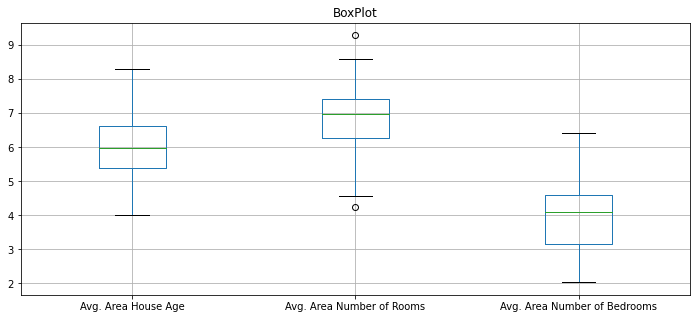

In [65]:
plt.figure(figsize = (12 ,5))
n60.boxplot()
plt.title("BoxPlot")

#### Histogram

Text(0.5, 0, 'Avg. Area Number of Rooms')

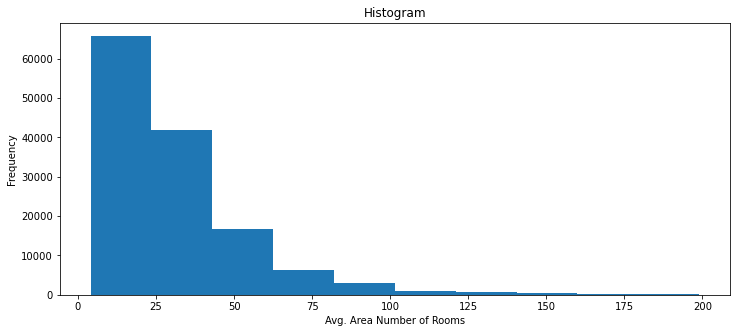

In [66]:
plt.figure(figsize = (12, 5))
cat_data[cat_data['price'] < 200]['price'].plot.hist()
plt.title('Histogram')
plt.xlabel('Avg. Area Number of Rooms')

#### Stem-leaf display 

Text(0.5, 0, 'Avg. Area Number of Rooms')

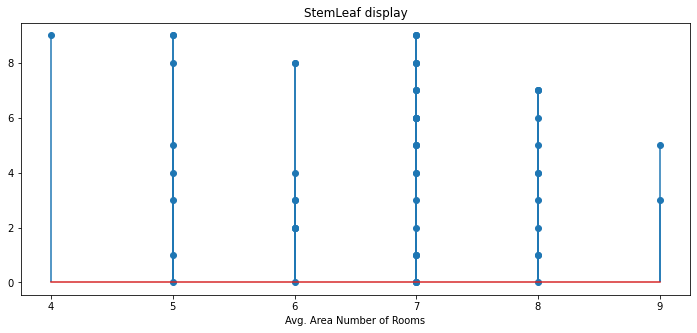

In [67]:
plt.figure(figsize = (12, 5))
data = [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]
plt.stem(round(nr60['Avg. Area Number of Rooms'],0),data)
plt.title('StemLeaf display')
plt.xlabel('Avg. Area Number of Rooms')

#### Ogive chart 

In [68]:
min(nr60['Avg. Area Number of Rooms']), max(nr60['Avg. Area Number of Rooms'])

(4.242191302, 9.289854372)

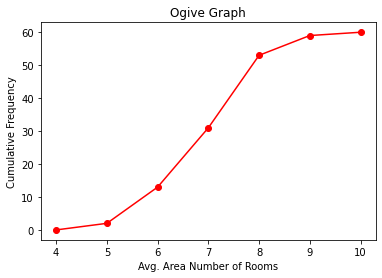

In [69]:
classInterval = [3, 4, 5, 6, 7, 8, 9, 10]
values, base = np.histogram(nr60['Avg. Area Number of Rooms'], bins = classInterval)
cumsum = np.cumsum(values)
plt.plot(base[1:], cumsum, color = 'red', marker = 'o', linestyle = '-')
plt.title('Ogive Graph')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Cumulative Frequency')
plt.show()

### CATEGORICAL DATA

In [70]:
cat_data['country']

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [71]:
cat_data['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [72]:
plt_cat = dict(cat_data['country'].value_counts().head(10))
plt_cat

{'US': 62397,
 'Italy': 23478,
 'France': 21098,
 'Spain': 8268,
 'Chile': 5816,
 'Argentina': 5631,
 'Portugal': 5322,
 'Australia': 4957,
 'New Zealand': 3320,
 'Austria': 3057}

#### Bar-chart

Text(0.5, 1.0, 'BarChart')

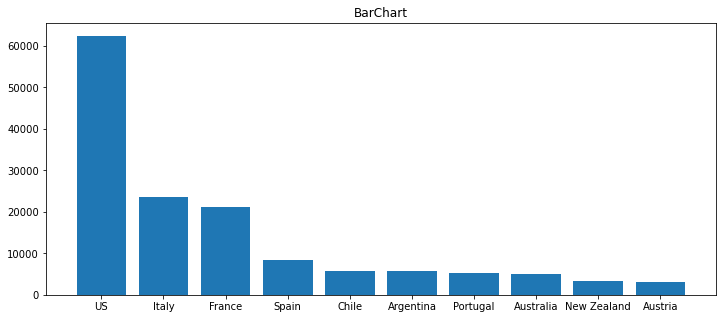

In [73]:
plt.figure(figsize = (12, 5))
plt.bar(plt_cat.keys(), plt_cat.values())
plt.title("BarChart")

#### Pie-chart

([<matplotlib.patches.Wedge at 0x246ecc622e0>,
 [Text(0.2220658961806807, 1.0773517242541877, 'US'),
  Text(-1.0935905158500696, -0.11857395853550008, 'Italy'),
  Text(-0.5136502883054795, -0.9727092994948172, 'France'),
  Text(0.172811375561622, -1.086340751549209, 'Spain'),
  Text(0.4946667758202623, -0.9824992523659173, 'Chile'),
  Text(0.7230908120573099, -0.8289388864797576, 'Argentina'),
  Text(0.8994387829583985, -0.6332534056049878, 'Portugal'),
  Text(1.0181667951984978, -0.41633685538902304, 'Australia'),
  Text(1.0765713621288104, -0.22581873758419113, 'New Zealand'),
  Text(1.097532082640588, -0.0736432452748627, 'Austria')])

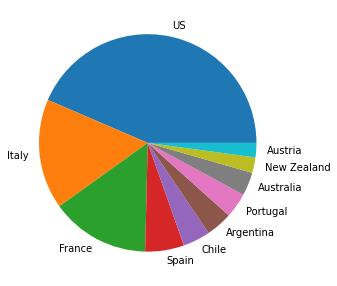

In [74]:
plt.figure(figsize = (12, 5))
plt.pie(plt_cat.values(), labels = plt_cat.keys())

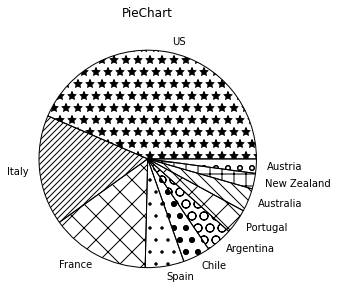

In [75]:
hatches = ['*','////','X','.','.o','O','x','\\\\','+','o']
plt.figure(figsize = (12, 5))
patches = plt.pie(plt_cat.values(), labels = plt_cat.keys())
for i in range(len(patches[0])):
    patches[0][i].set(hatch = hatches[i], fill=False)
    plt.title('PieChart')
plt.show()

#### Line-chart

Text(0.5, 1.0, 'LineChart')

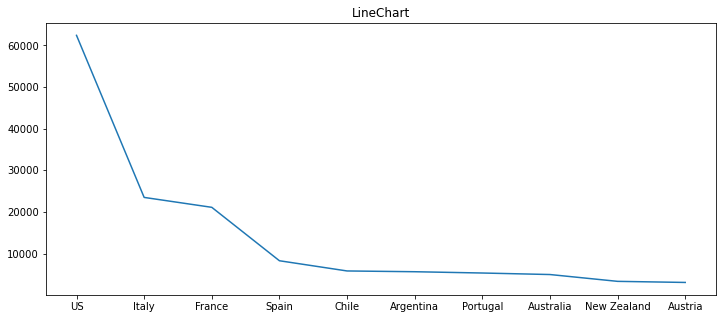

In [76]:
plt.figure(figsize = (12, 5))
plt.plot(plt_cat.keys(), plt_cat.values())
plt.title('LineChart')

#### Dotplot

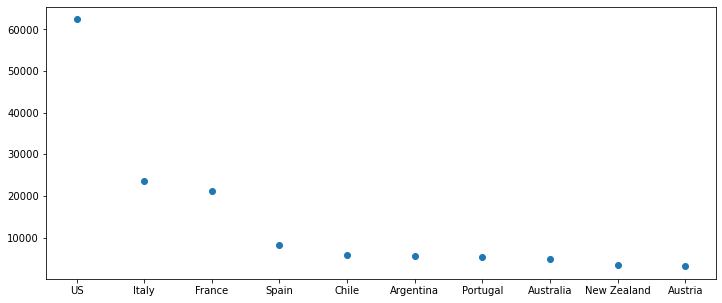

In [77]:
plt.figure(figsize = (12, 5))
plt.scatter(x = plt_cat.keys(), y = plt_cat.values())

# QUE

For Bi-variate data, plot Scatter plot trendline. Develop the model for simple linear regression finding values of m, x, p, R2. Experiment with the Bi-variate data for positive relation, negative relation and no-relation cases.

### CO-RELATION

In [78]:
nr60.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.013260,-0.124894,0.016698,0.054698,0.654901
Avg. Area House Age,-0.013260,1.000000,-0.062614,0.074605,0.043460,0.448896
Avg. Area Number of Rooms,-0.124894,-0.062614,1.000000,0.419474,-0.148030,0.224450
Avg. Area Number of Bedrooms,0.016698,0.074605,0.419474,1.000000,-0.156095,0.107983
Area Population,0.054698,0.043460,-0.148030,-0.156095,1.000000,0.405501
Price,0.654901,0.448896,0.224450,0.107983,0.405501,1.000000


## Simple Linear Regression

In [79]:
def LinearReg(X, Y):
    m, c, r, p, se = stats.linregress(X,Y)
    print("\nSLOPE : ", m, "\nINTERCEPT : ", c, "\nCORRELATION COEFFICIENT : ", r, "\nP-VALUE", p, "\nSTANDARD ERROR : ", se)
    print("\nEquation for Simple Linear Regression for Bi-variate Data")
    print(round(m, 6), "x + ", round(c, 6))
    pred = lambda X : m * X + c
    Y_p = pred(X)
#     print("\nPREDICTED VALUE OF Y : ", list(Y_p))
    plt.figure(figsize = (12, 5))
    plt.scatter(X, Y, label = "Data Points", c = 'blue', edgecolors = 'cyan')
    plt.plot(X, Y_p, color = 'green', marker = 'o', linestyle = 'dashed', linewidth = 2, markersize = 3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("RELATION IN BI-VARIATE DATA USING LINEAR REGRESSION")
    plt.legend()

### Positive Relation Case

POSITIVE RELATION BETWEEN 'Avg. Area Number of Rooms' AND 'Avg. Area Number of Bedrooms'


SLOPE :  0.5278489694683963 
INTERCEPT :  0.5219174778266704 
CORRELATION COEFFICIENT :  0.41947373201029636 
P-VALUE 0.000849340098469336 
STANDARD ERROR :  0.14999111349340388

Equation for Simple Linear Regression for Bi-variate Data
0.527849 x +  0.521917


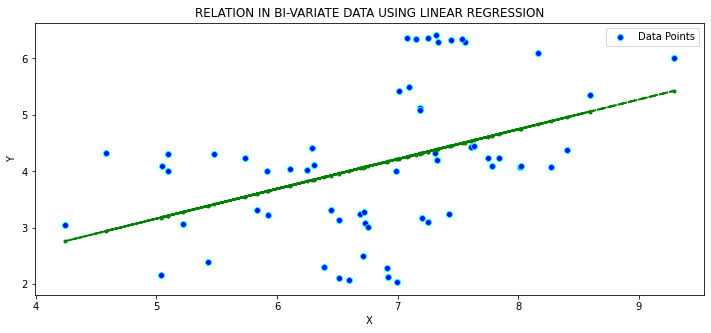

In [80]:
print("POSITIVE RELATION BETWEEN 'Avg. Area Number of Rooms' AND 'Avg. Area Number of Bedrooms'\n")
X = nr60['Avg. Area Number of Rooms']
Y = nr60['Avg. Area Number of Bedrooms']
LinearReg(X, Y)

### Negative Relation Case

NEGATIVE RELATION BETWEEN 'Avg. Area Number of Rooms' AND 'Area Population'


SLOPE :  -1294.7937642941304 
INTERCEPT :  43564.71832813274 
CORRELATION COEFFICIENT :  -0.1480302796519968 
P-VALUE 0.25900375443716983 
STANDARD ERROR :  1135.8599694376246

Equation for Simple Linear Regression for Bi-variate Data
-1294.793764 x +  43564.718328


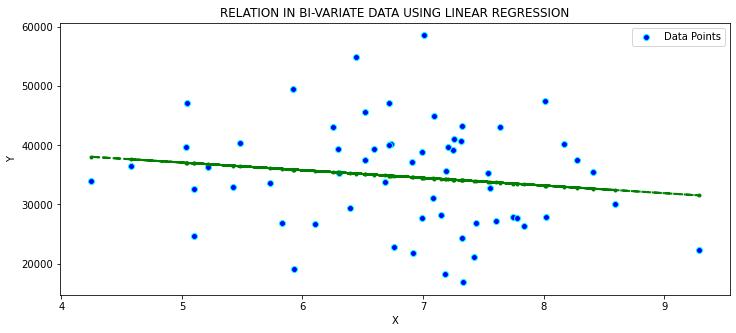

In [81]:
print("NEGATIVE RELATION BETWEEN 'Avg. Area Number of Rooms' AND 'Area Population'\n")
X = nr60['Avg. Area Number of Rooms']
Y = nr60['Area Population']
LinearReg(X, Y)

### No Relation Case

NO RELATION BETWEEN 'Avg. Area Number of Bedrooms' AND 'Avg. Area Income'


SLOPE :  158.88219711877326 
INTERCEPT :  65600.67255255817 
CORRELATION COEFFICIENT :  0.016698268979275014 
P-VALUE 0.8992315673642703 
STANDARD ERROR :  1249.1921071378495

Equation for Simple Linear Regression for Bi-variate Data
158.882197 x +  65600.672553


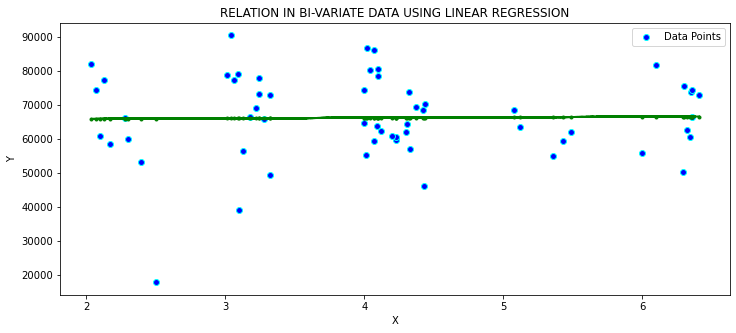

In [82]:
print("NO RELATION BETWEEN 'Avg. Area Number of Bedrooms' AND 'Avg. Area Income'\n")
X = nr60['Avg. Area Number of Bedrooms']
Y = nr60['Avg. Area Income']
LinearReg(X, Y)

# QUE

Write a program to find the equation of simple linear regression for given Bi-variate data (by coding).

In [86]:
x = nr60['Avg. Area Number of Rooms']
y = nr60['Avg. Area Number of Bedrooms']
mat1 = np.array([[len(x),np.sum(x)],[np.sum(x),np.sum(x**2)]])
mat2 = np.array([[np.sum(y)],[np.sum(x*y)]])
print("LINEAR REGRESSION MATRIX METHOD")
mat = np.dot(np.linalg.inv(mat1),mat2)
mat

LINEAR REGRESSION MATRIX METHOD


array([[0.52191748],
       [0.52784897]])

In [87]:
para = np.dot(np.linalg.inv(mat1), mat2)
print("SLOPE :", para[1], "INTERCEPT :", para[0])

SLOPE : [0.52784897] INTERCEPT : [0.52191748]


In [88]:
print("\nEquation for Simple Linear Regression for Bi-variate Data")
print(np.round(para[1], 6), "x +", np.round(para[0], 6))


Equation for Simple Linear Regression for Bi-variate Data
[0.527849] x + [0.521917]


# QUE

For a Uni-variate data, write a program to find Mean, Median, Mode, Pth percentile, 1st and 3rd quartile, Range.

In [89]:
uni_data = list(nr60['Avg. Area Number of Bedrooms'])
uni_data

[3.09,
 4.23,
 4.04,
 2.3,
 6.1,
 4.1,
 3.1,
 4.37,
 4.3,
 5.12,
 5.49,
 4.07,
 2.1,
 4.31,
 6.34,
 4.23,
 4.33,
 2.03,
 4.0,
 3.04,
 4.07,
 3.24,
 4.42,
 5.36,
 6.29,
 6.0,
 2.07,
 4.1,
 3.01,
 2.39,
 2.5,
 2.17,
 6.3,
 4.43,
 4.44,
 6.32,
 3.18,
 6.35,
 3.22,
 2.13,
 4.02,
 6.36,
 3.32,
 4.12,
 3.32,
 6.41,
 4.09,
 3.24,
 5.08,
 4.01,
 3.06,
 2.28,
 4.23,
 4.2,
 4.32,
 5.43,
 3.13,
 3.28,
 4.0,
 6.36]

## Mean

In [90]:
n = len(uni_data)
s = 0
for i in uni_data:
    s += i
mean = s / n    
print("Mean : ", mean)

Mean :  4.115666666666667


In [91]:
mn = np.mean(uni_data)
print("MEAN : ", mn)

MEAN :  4.115666666666667


## Median

In [92]:
for i in range(n):
    for j in range(n):
        if uni_data[i] < uni_data[j]:
            uni_data[i], uni_data[j] = uni_data[j], uni_data[i]
print("Sorted Data : ", uni_data)
if(n % 2 == 0):
    med = (uni_data[int((n / 2) - 1)] + uni_data[int((n / 2))]) / 2
else:
    med = uni_data[int((n - 1) / 2)]
print("\n Median : ", med) 

Sorted Data :  [2.03, 2.07, 2.1, 2.13, 2.17, 2.28, 2.3, 2.39, 2.5, 3.01, 3.04, 3.06, 3.09, 3.1, 3.13, 3.18, 3.22, 3.24, 3.24, 3.28, 3.32, 3.32, 4.0, 4.0, 4.01, 4.02, 4.04, 4.07, 4.07, 4.09, 4.1, 4.1, 4.12, 4.2, 4.23, 4.23, 4.23, 4.3, 4.31, 4.32, 4.33, 4.37, 4.42, 4.43, 4.44, 5.08, 5.12, 5.36, 5.43, 5.49, 6.0, 6.1, 6.29, 6.3, 6.32, 6.34, 6.35, 6.36, 6.36, 6.41]

 Median :  4.095


In [93]:
mn = np.median(uni_data)
print("MEDIAN : ", mn)

MEDIAN :  4.095


## Mode

In [94]:
mod_dict = {}
for i in uni_data:
    mod_dict[i] = uni_data.count(i)
print("MODE : ", list(mod_dict.keys())[list(mod_dict.values()).index(max(mod_dict.values()))])

MODE :  4.23


In [95]:
mod = stats.mode(uni_data)
print("MODE : ", mod[0])

MODE :  [4.23]


## Pth percentile

In [96]:
p = int(input("Enter The Value Of P : "))
uni_data = np.sort(uni_data)
per = uni_data[int(n * p / 100)]
print("Pth Percentile : ", per)

Enter The Value Of P : 10
Pth Percentile :  2.3


In [97]:
p = int(input("Enter The Value Of P : "))
per = np.percentile(uni_data, p)
print("Pth Percentile : ", per)

Enter The Value Of P : 10
Pth Percentile :  2.298


## 1st quartile

In [98]:
q1 = uni_data[int(n * 0.25)]
print("1st quartile : ", q1)

1st quartile :  3.18


## 3rd quartile

In [99]:
q3 = uni_data[int(n * 0.25)]
print("3rd quartile : ", q3)

3rd quartile :  3.18


In [100]:
q3 = np.quantile(uni_data, 0.75)
print("3rd quartile : ", q3)

3rd quartile :  4.6000000000000005


## Range

In [101]:
ran = uni_data[n - 1] - uni_data[0]
print("Range : ", ran)

Range :  4.380000000000001


# QUE

Write a program to find measure of variations:
-Range
-Inter Quartile Range
-Variation
-Standard Deviation
-Co-efficient of variance
-Mean Deviation

## Range

In [102]:
ran = max(uni_data) - min(uni_data)
print("Range : ", ran)

Range :  4.380000000000001


## Inter Quartile Range 

### 1st quartile

In [103]:
q1 = np.quantile(uni_data, 0.25)
print("1st quartile : ", q1)

1st quartile :  3.1675


### 3rd quartile

In [104]:
q3 = np.quantile(uni_data, 0.75)
print("3rd quartile : ", q3)

3rd quartile :  4.6000000000000005


### IQR

In [105]:
iqr = q3 - q1
print("IQR : ", iqr)

IQR :  1.4325000000000006


## Variation 

In [106]:
var = nr60['Avg. Area Number of Bedrooms'].var()
print("Variation : ", var)

Variation :  1.6806520903954807


In [107]:
var_data = np.array(nr60['Avg. Area Number of Bedrooms'])
var = sum(list(map(lambda x : np.square(x - var_data.mean()), var_data))) / (n - 1)
print("Variation : ", var)

Variation :  1.6806520903954807


## Standard Deviation 

In [108]:
std = nr60['Avg. Area Number of Bedrooms'].std()
print("Standard Deviation : ", std)

Standard Deviation :  1.296399664607902


In [109]:
std = np.sqrt(sum(list(map(lambda x : np.square(x - var_data.mean()), var_data))) / (n - 1))
print("Standard Deviation : ", std)

Standard Deviation :  1.296399664607902


## Co-efficient of variance 

In [110]:
coeff_var = std / mean
print("Co-efficient of variance : ", coeff_var)

Co-efficient of variance :  0.31499141441837736


## Mean Deviation

In [111]:
medev = sum(list(map(lambda x : x - var_data.mean(), var_data))) / (n - 1)
print("Mean Deviation : ", medev)

Mean Deviation :  -1.279579079228994e-16


# QUE

Write a program to accept the Bi-variate data and perform the following on it:
-Scatter plot
-Co-variance
-Co-relation coefficient
(By hard code and by using modules)

In [112]:
x_d = np.array(nr60['Avg. Area Number of Rooms'])
y_d = np.array(nr60['Avg. Area Number of Bedrooms'])

## Scatter plot

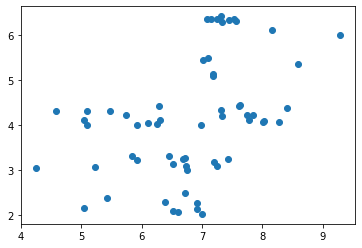

In [113]:
plt.scatter(x_d, y_d)

## Co-variance

In [114]:
covar = np.cov(x_d, y_d)
print("Co-variance : ", covar[0][1]) 

Co-variance :  0.5602446034140114


np.cov() returns a co-variance matrix

In [115]:
covar = sum(list(map(lambda x, y : (x - x_d.mean()) * (y - y_d.mean()), x_d, y_d))) / (n - 1)
print("Co-variance : ", covar)

Co-variance :  0.5602446034140114


## Co-relation Co-efficient

In [116]:
coeff = np.corrcoef(x_d, y_d)
print("Co-relation coefficient : ", coeff[0][1])

Co-relation coefficient :  0.4194737320102965


np.correff() returns a Co-relation coefficient matrix

In [117]:
stdx = np.sqrt(sum(list(map(lambda x : np.square(x - x_d.mean()), x_d))) / (n - 1))
stdy = np.sqrt(sum(list(map(lambda y : np.square(y - y_d.mean()), y_d))) / (n - 1))
covar = sum(list(map(lambda x, y : (x - x_d.mean()) * (y - y_d.mean()), x_d, y_d))) / (n - 1)
coeff = covar / (stdx * stdy)
print("Co-relation coefficient : ", coeff)

Co-relation coefficient :  0.4194737320102964


# QUE

For the univariate data distribution, compute weighted mean and mean of grouped data.

In [118]:
distri = nr60['Avg. Area Number of Rooms']
print("Data : ", distri)

Data :  1     6.730821
4     7.839388
5     6.104512
8     6.393121
9     8.167688
11    5.042747
13    7.250029
15    8.406418
18    5.097010
19    7.187774
20    7.091808
21    8.011898
22    6.517175
23    5.478088
24    7.150537
25    7.748682
26    7.312880
27    6.992699
28    6.988754
29    4.242191
30    8.273697
31    6.686686
32    6.290820
33    8.591923
34    7.333554
35    9.289854
36    6.593046
37    7.780837
38    6.756454
39    5.426903
40    6.713905
41    5.034525
42    7.555661
43    7.606832
44    7.634319
45    7.440505
46    7.204640
47    7.537182
48    5.928223
49    6.919204
50    6.252455
51    7.252665
52    5.831739
53    6.306116
54    6.445457
55    7.319886
56    8.022469
57    7.425597
58    7.182527
59    5.096917
60    5.219754
61    6.911743
62    5.731824
63    7.325974
64    4.580840
65    7.007676
66    6.515150
67    6.717844
68    5.919231
69    7.078584
Name: Avg. Area Number of Rooms, dtype: float64


## Weighted Mean

In [119]:
grp_data = dict(round(distri, 0).value_counts())
print("Data : ", grp_data)

Data :  {7.0: 27, 8.0: 12, 6.0: 10, 5.0: 8, 9.0: 2, 4.0: 1}


In [120]:
wem = sum(list(map(lambda x, y : x * y, grp_data.keys(), grp_data.values())))/ sum(grp_data.keys())
wem

10.435897435897436

## Mean of Grouped Data

In [121]:
b1 = round(distri.min(), 0)
last = distri.max() 
b2 = 0
d_dict = {}
while(b2 < last):
    cnt = 0
    b2 = b1 + 1
    for i in distri :
        if (i > b1 and i < b2) :
            cnt +=  1
    d_dict[(b1, b2)] = cnt
    b1 = b2
print("Data : ", d_dict)

Data :  {(4.0, 5.0): 2, (5.0, 6.0): 11, (6.0, 7.0): 18, (7.0, 8.0): 22, (8.0, 9.0): 6, (9.0, 10.0): 1}


In [122]:
grp_mn = sum(map(lambda x, y : (sum(x) / 2) * y , list(d_dict.keys()), list(d_dict.values()))) / sum(list(d_dict.values()))
print("Mean of Grouped Data : ", grp_mn)

Mean of Grouped Data :  6.866666666666666


# QUE

Write a program to implement Binomial Probability Distribution.

In [ ]:
from scipy.special import comb
def binomial_probability(n, x, p):
    nCx = comb(n, x)
    PpowX = p ** x
    fPowNminX = (1 - p) ** (n - x)
    prob = nCx * PpowX * fPowNminX    
    return prob

n = int(input("Enter the number of trial : "))
x = int(input("Enter the number of successes : "))
p = float(input("Enter the probability of a success on one trial : "))

result = binomial_probability(n, x, p)
print("Binomial Probability: ", round(result, 4))

In [ ]:
bmp_lst = []
n = int(input("Enter the number of trial : "))
x = int(input("Enter the number of successes : "))
p = float(input("Enter the probability of a success on one trial : "))
for i in range(n, n + 2):
    print("n: ", i)
    for j in range(x + 1):
        print("x: ", j)
        for k in np.arange(0.05, p + 0.05, 0.05):
            bmp = binomial_probability(i, j, k)
            bmp_lst.append(bmp_lst)
            print("p: ", round(k, 2), end = " ")
            print(" f(x): ", round(bmp,4))

In [ ]:
def binomial_probability_lib(n, x, p):
    dist = binom(n, p)
    prob = dist.pmf(x)
    return prob

n = int(input("Enter the number of trial : "))
x = int(input("Enter the number of successes : "))
p = float(input("Enter the probability of a success on one trial : "))

result = binomial_probability_lib(n, x, p)
print("Binomial Probability: ", round(result, 4))

# QUE

Write a program to implement Poisson and Hypergeometric probability
For all values of x:
-Find f(x)
-Plot of x vs f(x)
-Display in tabular format.
-Find expected value and variance.

### Poission Probablity

#### Find f(x)

In [ ]:
def fact(x):
    result = 1
    for i in range(1, x + 1):
        result *= i
    return result

def poisson_probability(mu, x):
    probability = (np.exp(-mu) * np.power(mu, x)) / fact(x)
    return probability

mu = float(input("Enter expected value or mean number of occurrences in an interval : "))
x = int(input("Enter occurrences in an interval : "))
print("x: ", x, " ", "f(x): ", round(poisson_probability(mu, x),4))

#### Tabular Format

In [ ]:
def display_table(x_values, mu_values, title):
    data = []
    for x in x_values:
        row = {'x': x}
        for mu in mu_values:
            probability = poisson_probability(mu, x)
            row[round(mu, 1)] = round(probability, 4)
        data.append(row)
    df = pd.DataFrame(data)
    df.set_index('x', inplace=True)
    print(title)
    return df
mu_values = np.arange(9.1, 10.0, 0.1)
dff = pd.DataFrame(display_table(x_values, mu_values, "Poisson Distribution"))
dff

In [ ]:
def plot_distribution(x_values, y_values, title):
    plt.bar(x_values, y_values)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.show()

# plot x and f(x)
plot_distribution(dff['x'], dff['9.1'], "Poisson Distribution")